In [1]:
import sys
sys.path.append('/Users/Lampe/PyScripts/CS_Research')
import ResearchFunc as rf
import numpy as np
import matplotlib.pyplot as plt

Load Test Data

In [2]:
fname = "90-04_PFO_10psi.csv"
data = rf.minimeter_import(fname)

time_idx = 1
pdiff_idx = 2
p_idx = 3
T_conf_idx = 4
T_us_idx = 5
T_ds_idx = 6

# PLOT DATA
# rf.plot_mmdat(data, splice=0, time_idx = 1, pdiff_idx = 2, p_idx = 3,
#               T_conf_idx = 4, T_us_idx = 5, T_ds_idx = 6)

Define Data For Analysis

In [ ]:
idx_min=200
idx_max=500
rf.plot_mmdat(data, 1, idx_min, idx_max)

In [7]:
#define problem discretization
NEL = 20  # NUMBER OF ELEMENTS
X0 = 0.0  # LOCATION OF UPSTREAM
XL = 3.5  # LOCATION OF DOWNSTREAM SIDE (LENGTH OF SAMPLE) [cm]


NNODE = NEL +1
X_BAR_ARR = np.linspace(X0, XL, NNODE)
X_ARR = (X_BAR_ARR - X0)/(XL - X0)  # DIMENSIONLESS DISCRETIZATION

NODES = np.linspace(x0, xL, n)

#constants
COND = 2.0  # HYDRAULIC CONDUCTIVITY [L/T]
STOR = 4.0  # SPECIFIC STORAGE [1/L]
AREA = 1.0  # [L2]

#boundary terms
BCTYPE = [1, 1]  # 1 => essential, 0 => flux
HEAD0 = 2. # essential BCT at x=0
HEADL = 0. # essential BCT at x=1

#forcing function
FORC = lambda x: 0*x # the forcing function F(x)
ITYPE = 1 # fully implicit (DETERMINES THE INTEGRATION TYPE)
H_EL = np.float(X_ARR[-1] - X_ARR[0])/(NNODE - 1)

# C = 4.0
STEPCR = 0.5 * STOR * H_EL**2 / COND # critical time step
print STEPCR
STEP = .1 #s_cr

# time domain
TSTART = 0
TEND = 1

# initial conditions
ICOND = np.zeros(len(NODES))

# array of evaluation times
TIME_ARR = np.linspace(TSTART, TEND, (TEND-TSTART)/STEP + 1) # temporal discretization

0.0025


In [8]:
sol_4i = rf.HeatEqn_1D(NODES, TIME_ARR,ICOND, STOR, COND, FORC, BCTYPE, HEAD0, HEADL, AREA, ITYPE)
out_i = sol_4i.solve()

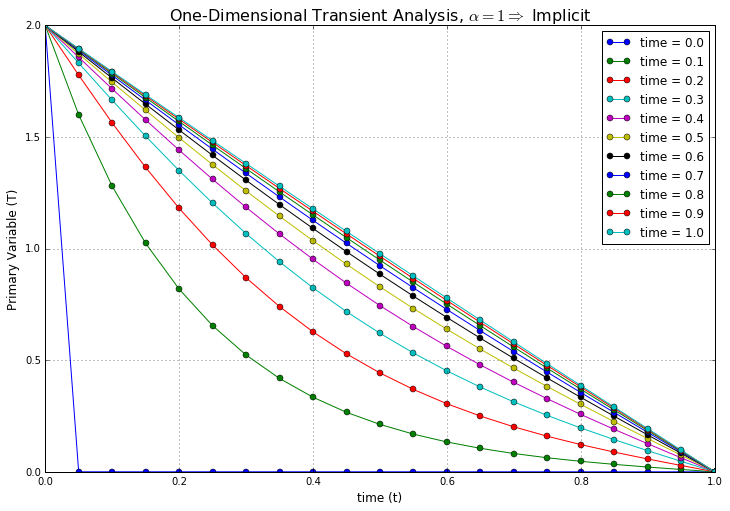

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig_4i, ax = plt.subplots(figsize = (12,8))

lbl = [None]*len(t_arr)
for i in xrange(len(t_arr)):
    lbl[i] = 'time = '+ str(t_arr[i])

# when plotting from arrays, columns from each are plotted against eachother
ax.plot(nodes, out_i.T,'o-', lw = 1)
ax.legend(lbl, frameon=1, framealpha = 1, loc=0)

ax.set_xlabel('time (t)', fontsize = 12)
ax.set_ylabel('Primary Variable (T)', fontsize = 12)
ax.set_title(''r'One-Dimensional Transient Analysis, $\alpha = 1 \Rightarrow$ Implicit' , fontsize = 16)
ax.grid(b = True, which = 'major')
ax.grid(b = True, which = 'major')